In [78]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l2
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r"preprocessed_data.csv")

In [4]:
df

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,Churn
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440826,45.0,6.0,25.0,2.0,15.0,837.00,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
440827,42.0,54.0,15.0,1.0,3.0,716.38,8.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
440828,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
440829,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
df.duplicated().sum()

0

In [8]:
test=pd.read_csv(r"customer_churn_dataset-testing-master.csv")

In [9]:
test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [11]:
with open("encoder.pkl","rb")as file:
    encoder=pickle.load(file)

In [12]:
with open("scaler.pkl","rb") as file:
    scaler=pickle.load(file)

In [16]:
encoded=encoder.transform(test[["Gender","Subscription Type","Contract Length"]])

In [17]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 193122 stored elements and shape (64374, 8)>

In [18]:
X_test=test.drop("Churn",axis=1)

In [21]:
X_test

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20
2,3,47,Male,27,10,2,29,Premium,Annual,757,21
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,5,53,Female,58,24,9,2,Standard,Annual,533,18
...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13


In [22]:
y_test=test["Churn"]

In [23]:
y_test

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [24]:
encoded=encoded.toarray()

In [25]:
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(["Gender","Subscription Type","Contract Length"]))

In [26]:
encoded_df

,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
64369,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64370,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
64371,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
64372,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [27]:
X_test=pd.concat([X_test.drop(["Gender","Subscription Type","Contract Length"],axis=1),encoded_df],axis=1)

In [28]:
X_test

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,41,28,28,7,13,584,20,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,47,27,10,2,29,757,21,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,35,9,12,5,17,232,18,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,53,58,24,9,2,533,18,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,947,14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64370,64371,37,6,1,5,22,923,9,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
64371,64372,25,39,14,8,30,327,20,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
64372,64373,50,18,19,7,22,540,13,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [63]:
y_test.value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64

In [29]:
X_test.drop("CustomerID",axis=1,inplace=True)

In [30]:
X_test

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,41,28,28,7,13,584,20,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,47,27,10,2,29,757,21,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,35,9,12,5,17,232,18,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,53,58,24,9,2,533,18,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947,14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
64370,37,6,1,5,22,923,9,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
64371,25,39,14,8,30,327,20,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
64372,50,18,19,7,22,540,13,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [32]:
X_train=df.drop("Churn",axis=1)
y_train=df["Churn"]

In [33]:
X_train

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.00,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,65.0,49.0,1.0,10.0,8.0,557.00,6.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,55.0,14.0,4.0,6.0,18.0,185.00,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.00,29.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,23.0,32.0,20.0,5.0,8.0,617.00,20.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440826,45.0,6.0,25.0,2.0,15.0,837.00,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
440827,42.0,54.0,15.0,1.0,3.0,716.38,8.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
440828,25.0,8.0,13.0,1.0,20.0,745.38,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
440829,26.0,35.0,27.0,1.0,5.0,977.31,9.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
y_train

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440826    0.0
440827    0.0
440828    0.0
440829    0.0
440830    0.0
Name: Churn, Length: 440831, dtype: float64

In [65]:
y_train.value_counts()

Churn
1.0    249999
0.0    190832
Name: count, dtype: int64

In [36]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
X_train_scaled.shape,y_train.shape

((440831, 15), (440831,))

In [42]:
X_test_scaled.shape,y_test.shape

((64374, 15), (64374,))

In [46]:
(X_train_scaled.shape[1],)

(15,)

In [70]:
model=Sequential()


model.add(Dense(256,activation="relu",input_shape=(X_train.shape[1],),kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


#model.add(Dense(128,activation="relu",kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.1))
#model.add(BatchNormalization())


model.add(Dense(128,activation="relu",kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())


model.add(Dense(64,activation="relu",kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.1))
model.add(BatchNormalization())


model.add(Dense(1,activation="sigmoid"))



model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary()

c:\Users\HP\OneDrive\Desktop\Artificial Intellegence\Deep learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 256)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,105 (184.00 KB)

 Trainable params: 46,209 (180.50 KB)

 Non-trainable params: 896 (3.50 KB)

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
callback=EarlyStopping(
    monitor="val_accuracy",
    patience=5,
)

In [73]:
#history=model.fit(X_train_scaled,y_train,epochs=100,batch_size=1024,validation_data=(X_test_scaled,y_test),callbacks=callback)
history=model.fit(X_train_scaled,y_train,validation_split=0.2,batch_size=1024,epochs=100,callbacks=callback)

Epoch 1/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9070 - loss: 1.5390 - val_accuracy: 0.0000e+00 - val_loss: 1.4337
Epoch 2/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9695 - loss: 0.1189 - val_accuracy: 2.2684e-04 - val_loss: 1.2914
Epoch 3/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9731 - loss: 0.0911 - val_accuracy: 0.9551 - val_loss: 0.2397
Epoch 4/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9750 - loss: 0.0815 - val_accuracy: 0.9945 - val_loss: 0.0480
Epoch 5/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9753 - loss: 0.0795 - val_accuracy: 0.8391 - val_loss: 0.4154
Epoch 6/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9760 - loss: 0.0778 - val_accuracy: 0.9986 - val_loss: 0.0439
Epoch 7/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9769 - loss: 0.0762 - val_accuracy: 0.9985 - val_loss: 0.0523
Epoch 8/100
345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9766 - loss: 0.0752 - 

In [74]:
X_train.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
count,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000,440831.000000
mean,39.373172,31.256298,15.807484,3.604443,12.965719,631.616368,14.480853,0.432318,0.567682,0.324444,0.337268,0.338288,0.401964,0.197588,0.400448
std,12.442377,17.255729,8.586249,3.070219,8.258072,240.803255,8.596212,0.495398,0.495398,0.468167,0.472778,0.473128,0.490295,0.398180,0.489990
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X_test.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.533647,0.466353,0.333225,0.332759,0.334017,0.332588,0.343772,0.323640
std,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.498870,0.498870,0.471370,0.471205,0.471649,0.471144,0.474970,0.467868
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
import seaborn as sns

In [84]:
columns=X_test.columns
columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction', 'Gender_Female', 'Gender_Male',
       'Subscription Type_Basic', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Annual',
       'Contract Length_Monthly', 'Contract Length_Quarterly'],
      dtype='object')

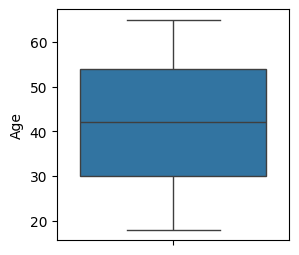

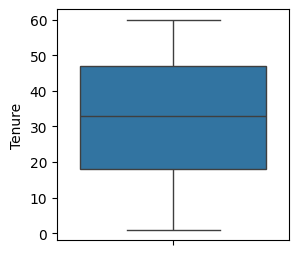

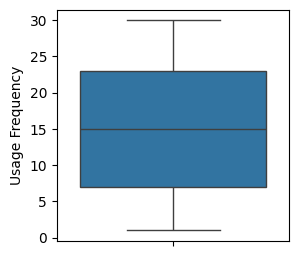

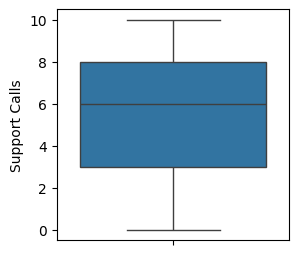

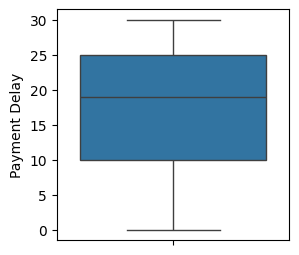

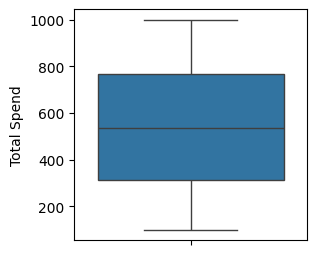

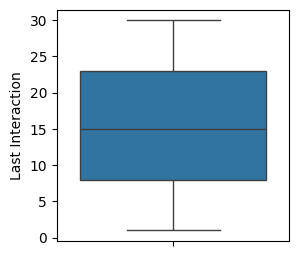

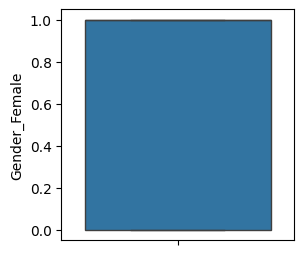

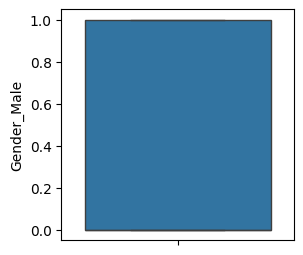

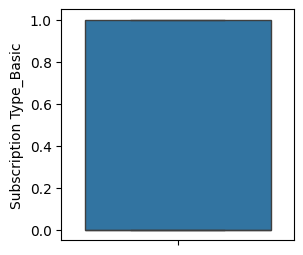

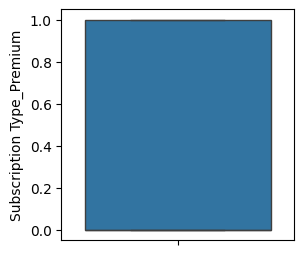

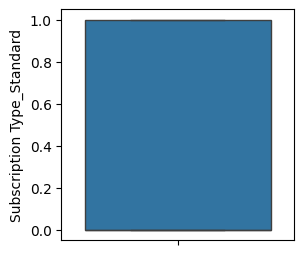

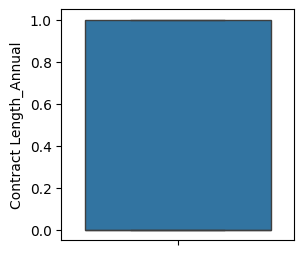

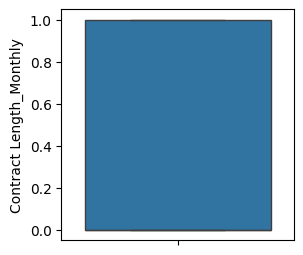

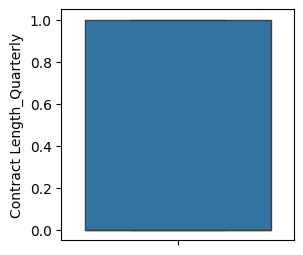

In [88]:
for i in columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(X_test[i])

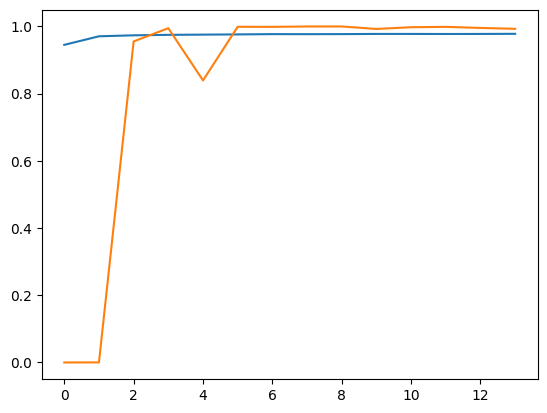

In [91]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

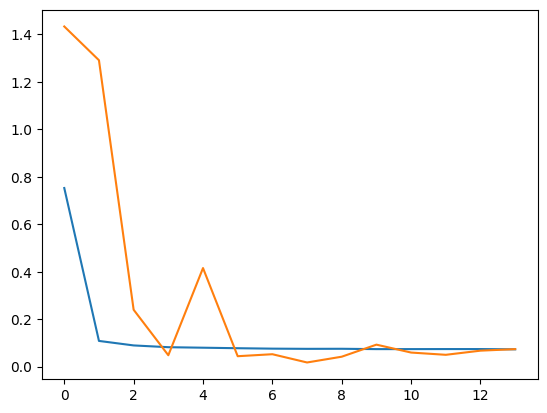

In [92]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [93]:
model.save("ann.h5","wb")

In [98]:
len(y<0.5)

64374

26691

In [119]:
y=model.predict(X_train_scaled)
len(y[y<0.5])

13776/13776 ━━━━━━━━━━━━━━━━━━━━ 10s 696us/step


195713